## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Насыбуллин А. А.|
|---------|--------|
| Группа  | М8О-107М-20 VR/AR & ИИ|

Для скачивания датасетов можно Использовать `wget` или `curl`, либо скачать вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

### Подлючение модулей и библиотек

In [1]:
import numpy as np
import os

Получение модуля `mlp.py`, в котором содержатся неободимые для работы классы нейронной сети

In [2]:
!wget -P . 'https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/NotebooksColab/MLP/mlp.py'

--2021-06-15 08:58:25--  https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/NotebooksColab/MLP/mlp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11112 (11K) [text/plain]
Saving to: ‘./mlp.py’

mlp.py              100%[===================>]  10.85K  --.-KB/s    in 0s      

2021-06-15 08:58:25 (61.1 MB/s) - ‘./mlp.py’ saved [11112/11112]



Подключение модуля `mlp` для дальнейшего использования

In [3]:
import mlp

## Установка модулей для загрузки и распаковки данных

In [4]:
!pip install gzip-reader
!pip install wget

## Fashion MNIST

### Настройка путей для сохранения файлов

In [5]:
if 'google.colab' in str(get_ipython()):
    data_dir = os.path.join(os.getcwd(), '/content/data/fashion-mnist')
else:
    data_dir = os.path.join(os.getcwd(), '../../../data/fashion-mnist')


img_dir = os.path.join(os.getcwd(), 'img_fashion-mnist')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

### Fashion MNIST. Загрузка данных

In [6]:
!wget -P data/fashion-mnist http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -P data/fashion-mnist http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -P data/fashion-mnist http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -P data/fashion-mnist http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2021-06-15 08:58:31--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.47.62
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.47.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion-mnist/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  15.1MB/s    in 1.7s    

2021-06-15 08:58:33 (15.1 MB/s) - ‘data/fashion-mnist/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2021-06-15 08:58:33--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.47.62
Connecting to fashion

Распаковка данных

In [7]:
!gzip -d /content/data/fashion-mnist/t10k-images-idx3-ubyte.gz
!gzip -d /content/data/fashion-mnist/t10k-labels-idx1-ubyte.gz
!gzip -d /content/data/fashion-mnist/train-images-idx3-ubyte.gz
!gzip -d /content/data/fashion-mnist/train-labels-idx1-ubyte.gz

gzip: /content/data/fashion-mnist/t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: /content/data/fashion-mnist/t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: /content/data/fashion-mnist/train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: /content/data/fashion-mnist/train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y


Установка модуля idx2numpy для получения numpy массивов из распакованных данных

In [8]:
!pip install idx2numpy
import idx2numpy

Разбиваем данные на обучающие и тестовые выборки

In [9]:
x_train = idx2numpy.convert_from_file(os.path.join(data_dir, 'train-images-idx3-ubyte'))
y_train = idx2numpy.convert_from_file(os.path.join(data_dir, 'train-labels-idx1-ubyte'))
x_test = idx2numpy.convert_from_file(os.path.join(data_dir, 't10k-images-idx3-ubyte'))
y_test = idx2numpy.convert_from_file(os.path.join(data_dir, 't10k-labels-idx1-ubyte'))

### Fashion MNIST. Первоначальный анализ данных, предобработка

In [10]:
print(f'Размерность матрицы данных train_images: {x_train.shape}')
print(f'Размерность матрицы данных test_images: {x_test.shape}')
print(f'Размерность матрицы данных train_labels: {y_train.shape}')
print(f'Размерность матрицы данных test_labels: {y_test.shape}')

print(f'Количество признаков (пикселей): {x_train.shape[1]}')
print(f'Количество объектов (картинок): {x_train.shape[0]}')

# необходимо узнать количество классов на выходе
print(f'Количество разных ответов (классов): {len(np.unique(y_train))}')

Размерность матрицы данных train_images: (60000, 28, 28)
Размерность матрицы данных test_images: (10000, 28, 28)
Размерность матрицы данных train_labels: (60000,)
Размерность матрицы данных test_labels: (10000,)
Количество признаков (пикселей): 28
Количество объектов (картинок): 60000
Количество разных ответов (классов): 10


Приводим данные признаков к типу float и масштабируем в диапазон от 0 до 1

In [11]:
x_train = x_train.astype(float)
x_train = x_train / 255

x_test = x_test.astype(float)
x_test = x_test / 255

Преобразуем данные признаков в двумерные матрицы

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(f'Размерность матрицы данных x_train: {x_train.shape}')
print(f'Размерность матрицы данных x_test: {x_test.shape}')

Размерность матрицы данных x_train: (60000, 784)
Размерность матрицы данных x_test: (10000, 784)


### Fashion MNIST. Применение нейронных сетей и отображение графика обучения

In [13]:
loss = mlp.LossFunction('cross-entropy')
metrics = mlp.NeuralNetworkMetrics()
n_epoch = 30

Применение нейронной сети с одним слоем (с различными гиперпараметрами)

Initial train loss=2.370, accuracy=0.112
Initial valid loss=2.371, accuracy=0.114
Final train loss=0.405, accuracy=0.862
Final valid loss=0.449, accuracy=0.842


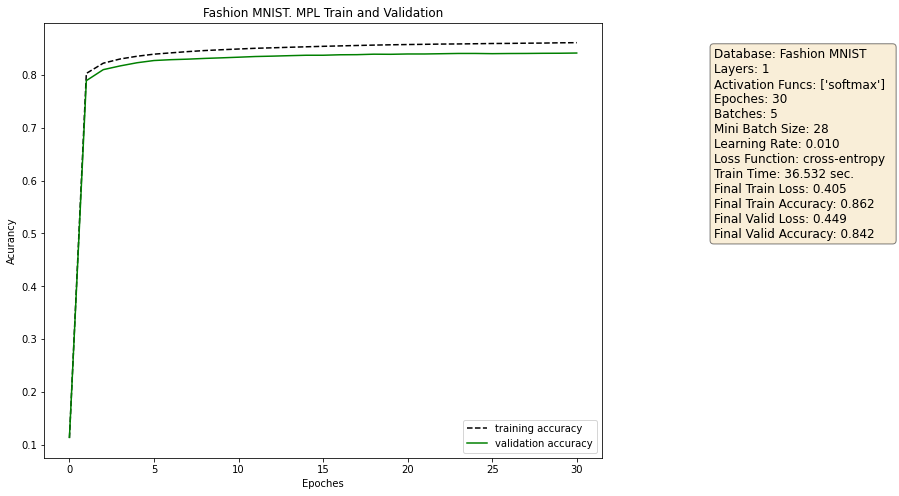

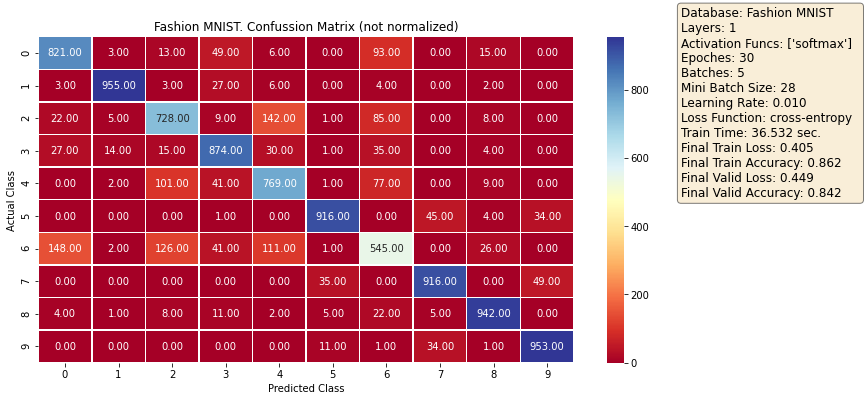

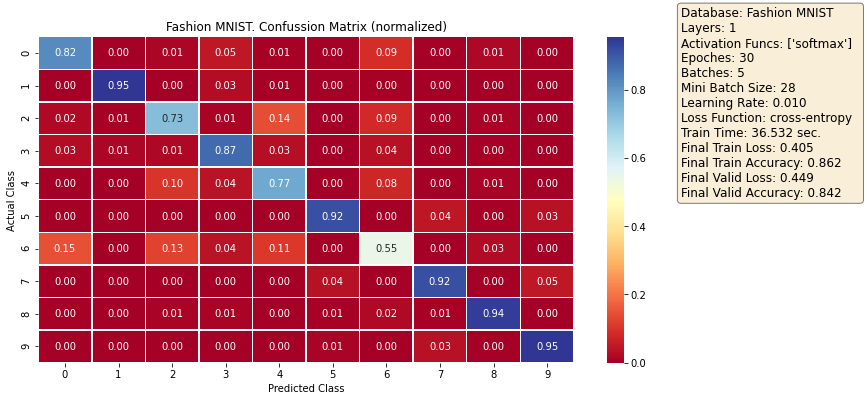

Database: Fashion MNIST  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 36.532 sec.  
Final Train Loss: 0.405  
Final Train Accuracy: 0.862  
Final Valid Loss: 0.449  
Final Valid Accuracy: 0.842


In [14]:
layer1 = mlp.NeuralNetworkLayer(784, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 1'), img_format=' 1.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 1'), ' 1.png', description)
print(description)

Initial train loss=2.358, accuracy=0.114
Initial valid loss=2.358, accuracy=0.114
Final train loss=0.386, accuracy=0.864
Final valid loss=0.454, accuracy=0.839


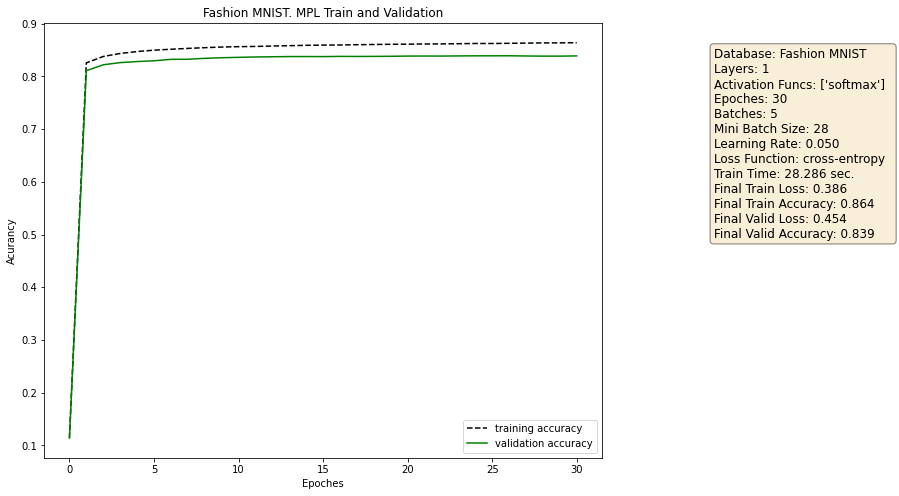

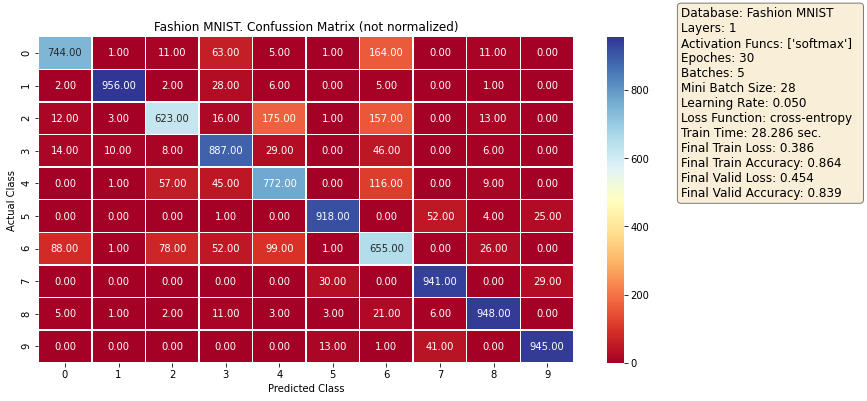

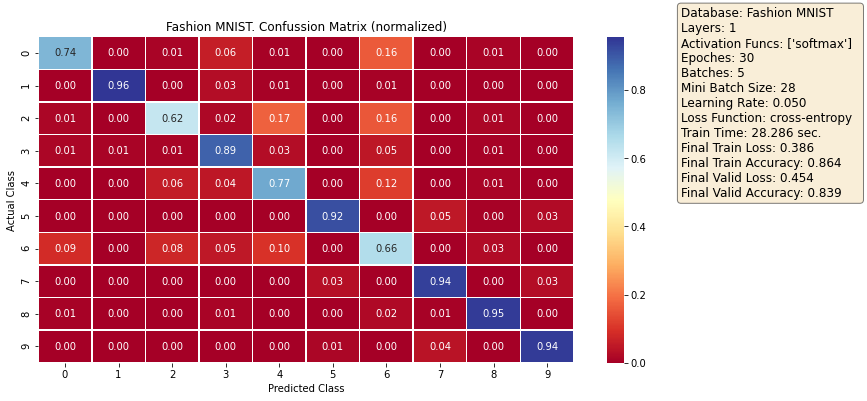

Database: Fashion MNIST  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.050  
Loss Function: cross-entropy  
Train Time: 28.286 sec.  
Final Train Loss: 0.386  
Final Train Accuracy: 0.864  
Final Valid Loss: 0.454  
Final Valid Accuracy: 0.839


In [15]:
layer1 = mlp.NeuralNetworkLayer(784, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.05)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 1'), img_format=' 2.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 1'), ' 2.png', description)
print(description)

Initial train loss=2.314, accuracy=0.104
Initial valid loss=2.312, accuracy=0.104
Final train loss=0.427, accuracy=0.850
Final valid loss=0.513, accuracy=0.822


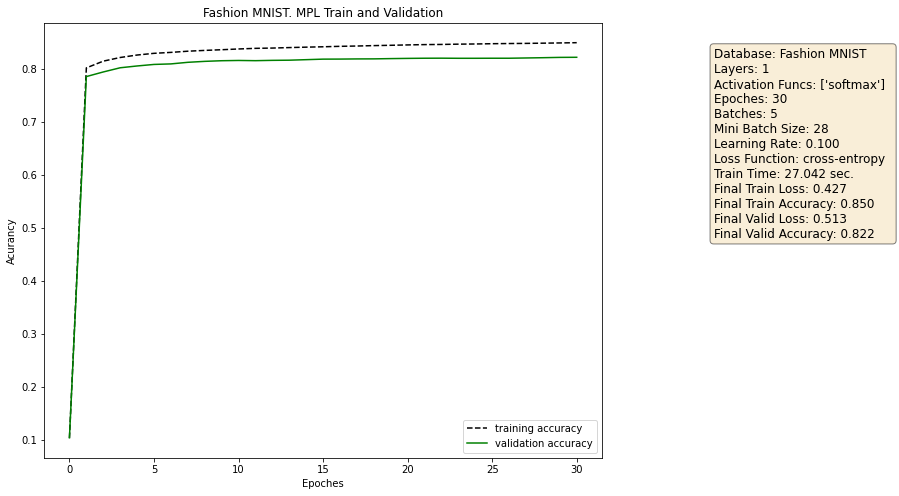

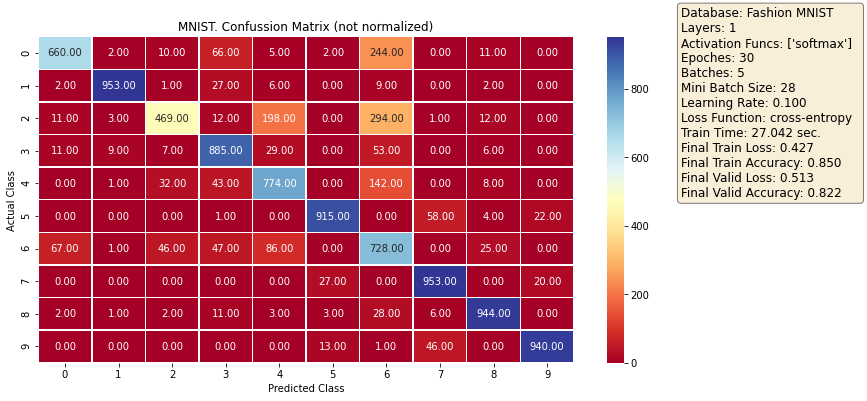

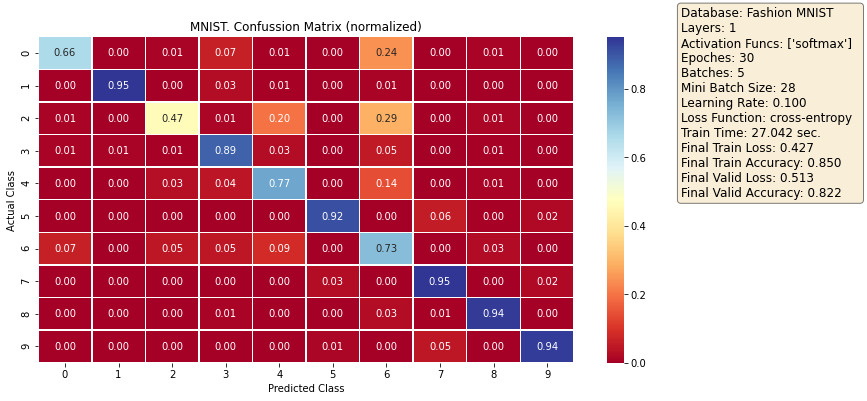

Database: Fashion MNIST  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.100  
Loss Function: cross-entropy  
Train Time: 27.042 sec.  
Final Train Loss: 0.427  
Final Train Accuracy: 0.850  
Final Valid Loss: 0.513  
Final Valid Accuracy: 0.822


In [16]:
layer1 = mlp.NeuralNetworkLayer(784, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.1)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 1'), img_format=' 3.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 1'), ' 3.png', description)
print(description)

### Применение нейронной сети с 2-мя слоями (с различными гиперпараметрами)

Initial train loss=2.433, accuracy=0.099
Initial valid loss=2.430, accuracy=0.098
Final train loss=0.292, accuracy=0.896
Final valid loss=0.362, accuracy=0.872


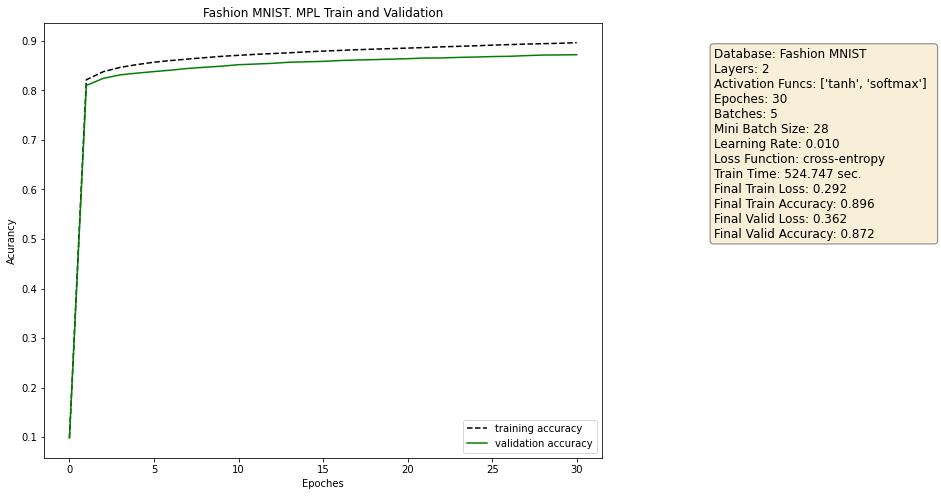

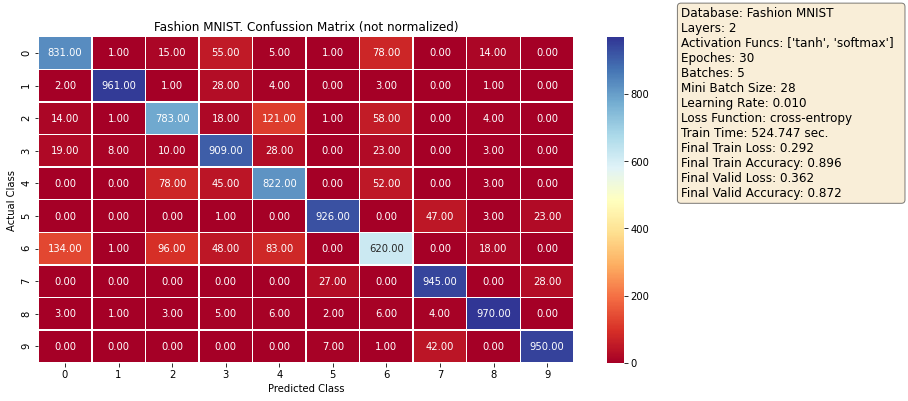

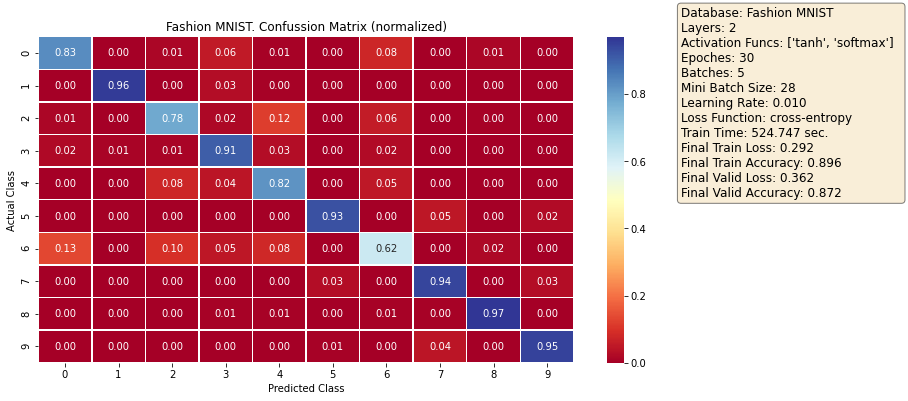

Database: Fashion MNIST  
Layers: 2  
Activation Funcs: ['tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 524.747 sec.  
Final Train Loss: 0.292  
Final Train Accuracy: 0.896  
Final Valid Loss: 0.362  
Final Valid Accuracy: 0.872


In [17]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(392, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 2'), img_format=' 1.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 2'), ' 1.png', description)
print(description)

Initial train loss=2.378, accuracy=0.030
Initial valid loss=2.378, accuracy=0.034
Final train loss=0.395, accuracy=0.861
Final valid loss=0.435, accuracy=0.843


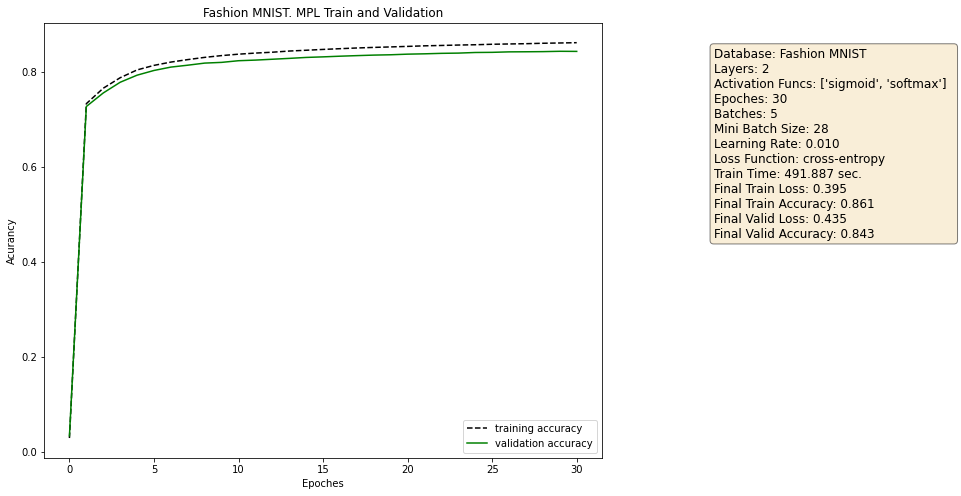

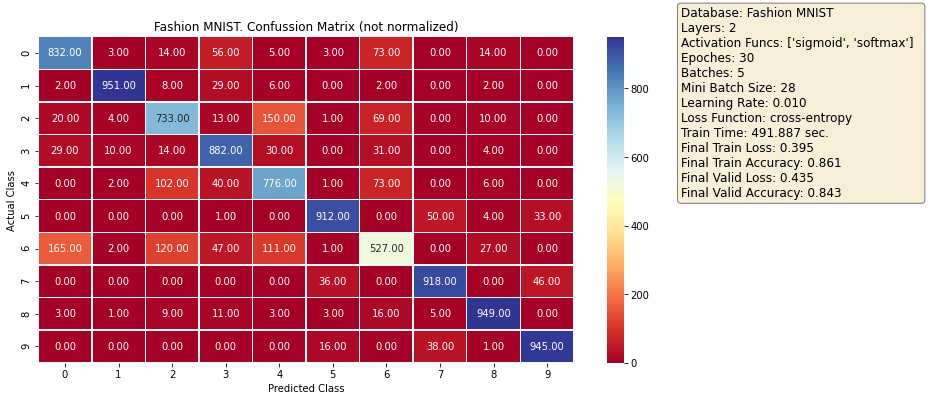

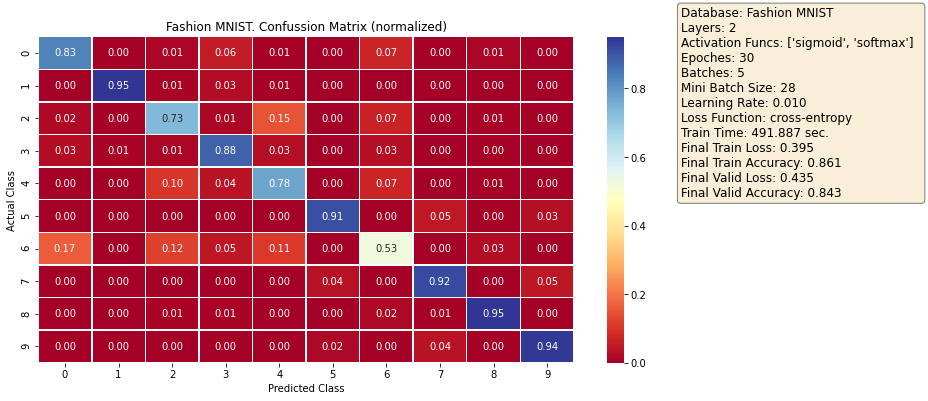

Database: Fashion MNIST  
Layers: 2  
Activation Funcs: ['sigmoid', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 491.887 sec.  
Final Train Loss: 0.395  
Final Train Accuracy: 0.861  
Final Valid Loss: 0.435  
Final Valid Accuracy: 0.843


In [18]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('sigmoid'))
layer2 = mlp.NeuralNetworkLayer(392, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 2'), img_format=' 2.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 2'), ' 2.png', description)
print(description)

### Применение нейронной сети с 3-мя слоями (с различными гиперпараметрами)

Initial train loss=2.430, accuracy=0.116
Initial valid loss=2.430, accuracy=0.116
Final train loss=0.321, accuracy=0.885
Final valid loss=0.379, accuracy=0.866


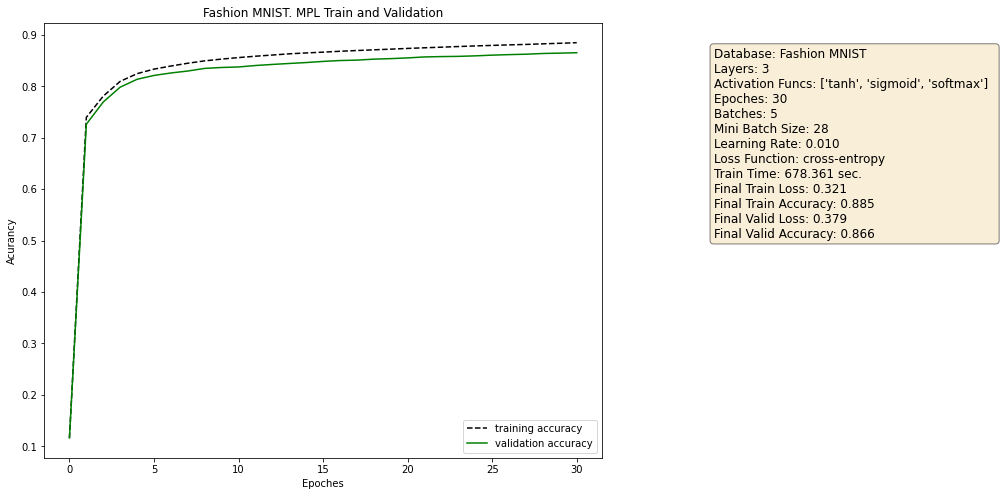

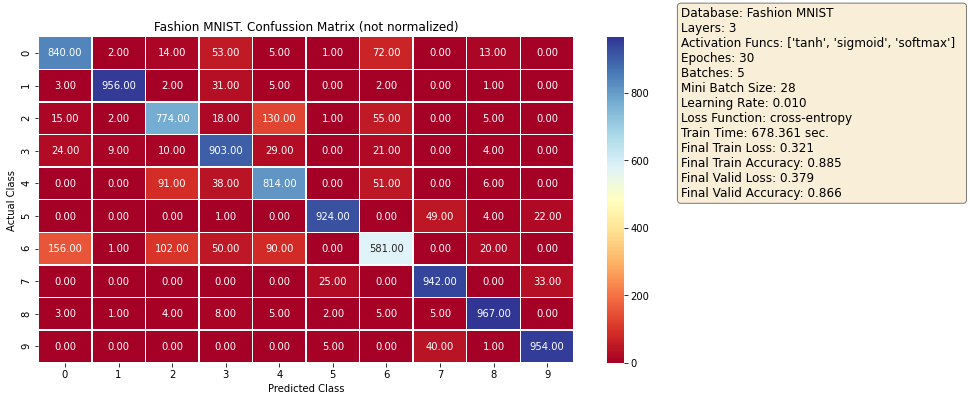

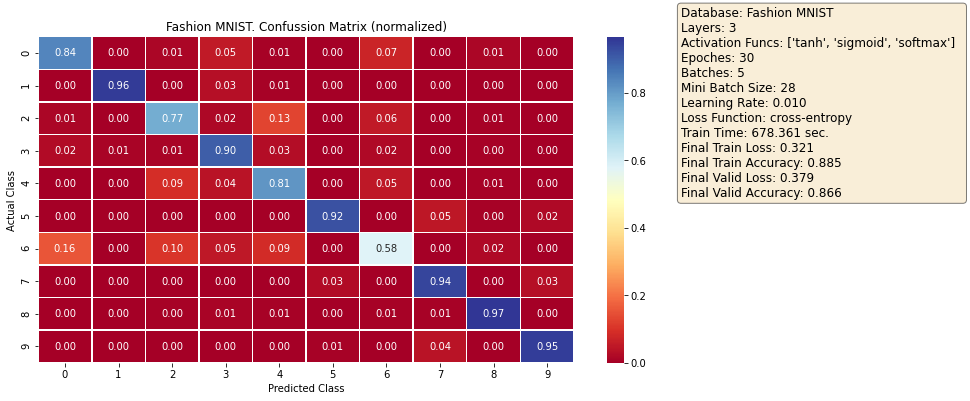

Database: Fashion MNIST  
Layers: 3  
Activation Funcs: ['tanh', 'sigmoid', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 678.361 sec.  
Final Train Loss: 0.321  
Final Train Accuracy: 0.885  
Final Valid Loss: 0.379  
Final Valid Accuracy: 0.866


In [19]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(392, 196, activation_func=mlp.ActivationFunction('sigmoid'))
layer3 = mlp.NeuralNetworkLayer(196, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 3'), img_format=' 1.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 3'), ' 1.png', description)
print(description)

Initial train loss=2.392, accuracy=0.100
Initial valid loss=2.392, accuracy=0.100
Final train loss=0.352, accuracy=0.874
Final valid loss=0.404, accuracy=0.855


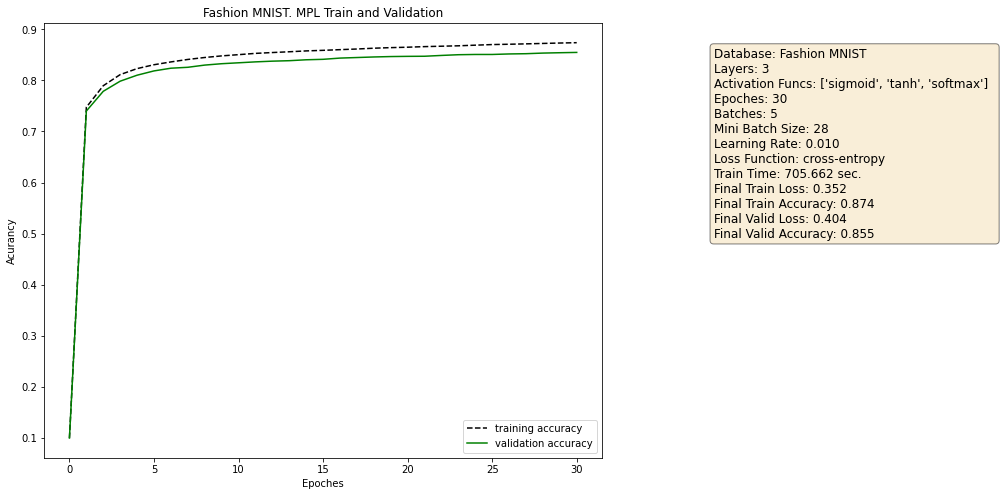

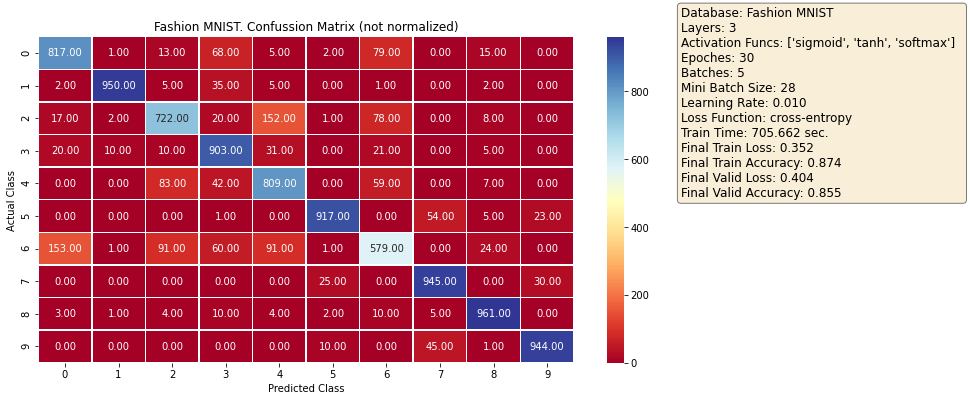

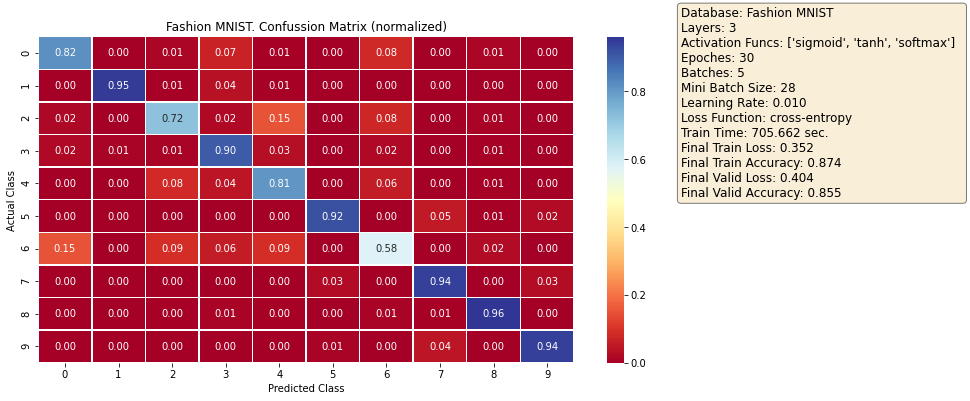

Database: Fashion MNIST  
Layers: 3  
Activation Funcs: ['sigmoid', 'tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 705.662 sec.  
Final Train Loss: 0.352  
Final Train Accuracy: 0.874  
Final Valid Loss: 0.404  
Final Valid Accuracy: 0.855


In [20]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('sigmoid'))
layer2 = mlp.NeuralNetworkLayer(392, 196, activation_func=mlp.ActivationFunction('tanh'))
layer3 = mlp.NeuralNetworkLayer(196, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 3'), img_format=' 2.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 3'), ' 2.png', description)
print(description)

Initial train loss=2.364, accuracy=0.121
Initial valid loss=2.361, accuracy=0.124
Final train loss=0.251, accuracy=0.909
Final valid loss=0.338, accuracy=0.880


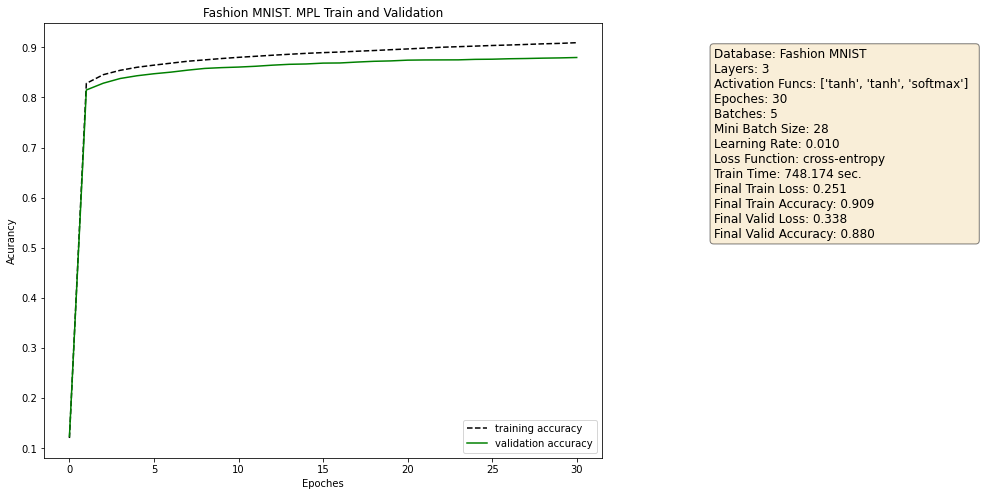

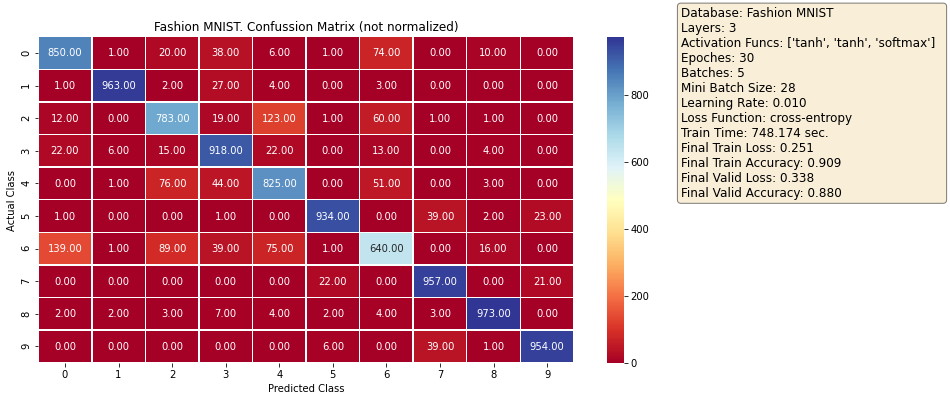

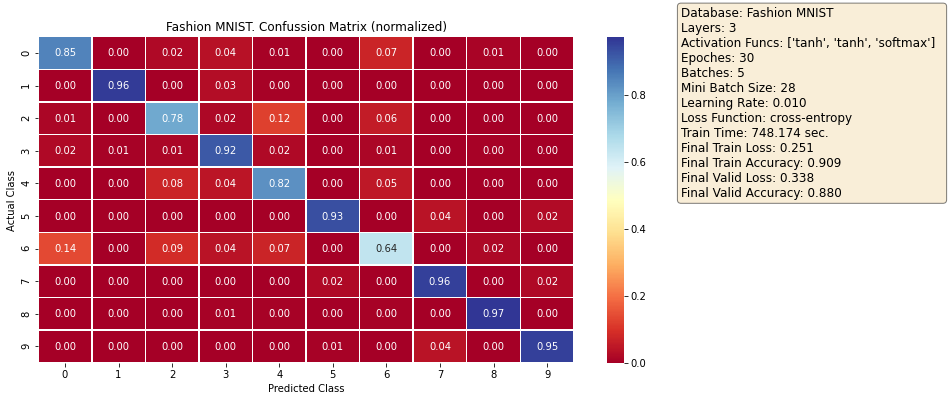

Database: Fashion MNIST  
Layers: 3  
Activation Funcs: ['tanh', 'tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 748.174 sec.  
Final Train Loss: 0.251  
Final Train Accuracy: 0.909  
Final Valid Loss: 0.338  
Final Valid Accuracy: 0.880


In [21]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(392, 196, activation_func=mlp.ActivationFunction('tanh'))
layer3 = mlp.NeuralNetworkLayer(196, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 3'), img_format=' 3.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 3'), ' 3.png', description)
print(description)

Initial train loss=2.394, accuracy=0.102
Initial valid loss=2.394, accuracy=0.103
Final train loss=0.418, accuracy=0.852
Final valid loss=0.458, accuracy=0.835


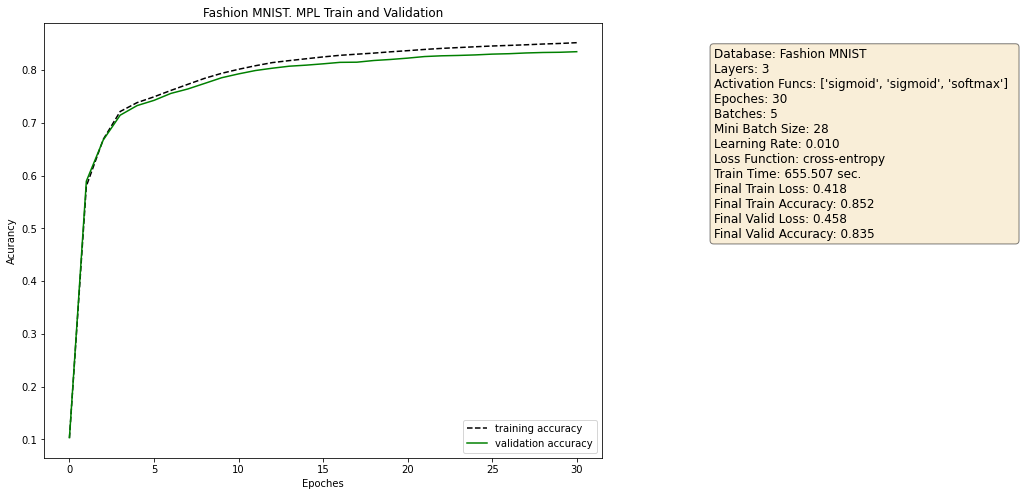

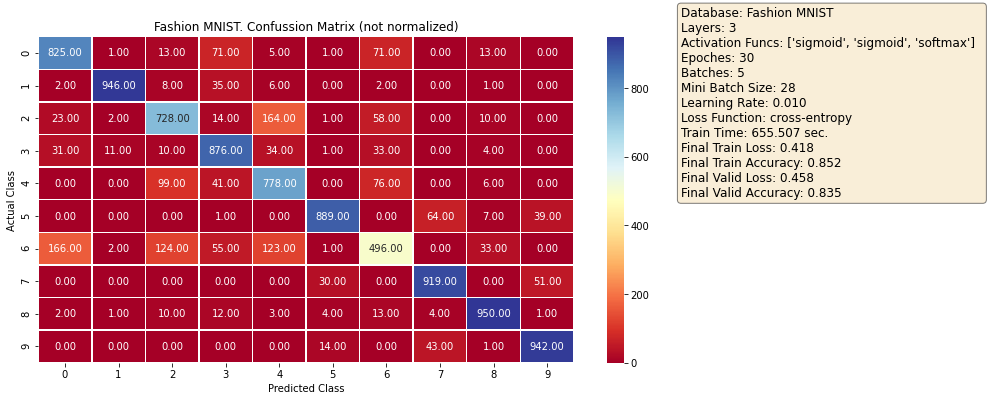

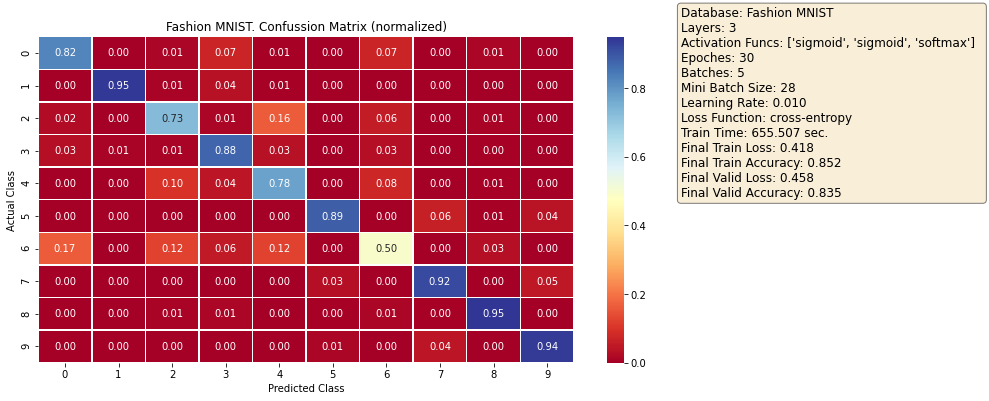

In [22]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('sigmoid'))
layer2 = mlp.NeuralNetworkLayer(392, 196, activation_func=mlp.ActivationFunction('sigmoid'))
layer3 = mlp.NeuralNetworkLayer(196, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
                                 n_batches=5, db_name='Fashion MNIST', img_dir=os.path.join(img_dir, 'layers 3'), img_format=' 4.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'Fashion MNIST', os.path.join(img_dir, 'layers 3'), ' 4.png', description)

In [25]:
# архивирование папки с графиками
!zip -r /content/img_fashion-mnist.zip /content/img_fashion-mnist

  adding: content/img_fashion-mnist/ (stored 0%)
  adding: content/img_fashion-mnist/layers 3/ (stored 0%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. Confussion Matrix (normalized) 1.png (deflated 5%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. MPL Train and Validation 2.png (deflated 7%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. Confussion Matrix (normalized) 4.png (deflated 5%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. MPL Train and Validation 4.png (deflated 7%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. Confussion Matrix (not normalized) 3.png (deflated 4%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. Confussion Matrix (not normalized) 4.png (deflated 4%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. Confussion Matrix (not normalized) 2.png (deflated 4%)
  adding: content/img_fashion-mnist/layers 3/Fashion MNIST. Confussion Matrix (not normalized) 1.png (deflated 4%)
 

In [26]:
# скачивание архива себе на ПК
from google.colab import files
files.download("/content/img_fashion-mnist.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Результаты моделей нейронных сетей с различными параметрами при работе с набором данных **Fashion MNIST**

|Layers|Activation Functions|Loss Function|Epoches/Batches/Mini Batches Size|Learning Rate|Train Time|Final Train Loss|Final Train Accurancy|Final Valid Loss|Final Valid Accurancy|Best Class/Accurancy|Worst Class/Accurancy|
|---|---|---|---|---|---|---|---|---|---|---|---|
|1|softmax|cross-entropy|30/5/28|0.01|36.532 sec.|0.405|0.862|0.449|0.842|1 / 0.95 <br> 9 / 0.95 <br> 8 / 0.94|6 / 0.55 <br> 2 / 0.73 <br> 4 / 0.77|
|1|softmax|cross-entropy|30/5/28|0.05|28.286 sec.|0.386|0.864|0.454|0.839|1 / 0.96 <br> 8 / 0.95 <br> 9 / 0.94|2 / 0.62 <br> 6 / 0.66 <br> 4 / 0.77|
|1|softmax|cross-entropy|30/5/28|0.1|27.042 sec.|0.427|0.85|0.513|0.822|1 / 0.95 <br> 7 / 0.95 <br> 8, 9 / 0.94|2 / 0.47 <br> 6 / 0.73 <br> 4 / 0.77|
|---|
|2|tanh/softmax|cross-entropy|30/5/28|0.01|524.747 sec.|0.292|0.896|0.362|0.872|8 / 0.97 <br> 1 / 0.96 <br> 9 / 0.95|6 / 0.62 <br> 2 / 0.78 <br> 4 / 0.82|
|2|sigmoid/softmax|cross-entropy|30/5/28|0.01|491.887 sec.|0.395|0.861|0.435|0.843|1 / 0.95 <br> 8 / 0.95 <br> 9 / 0.94|6 / 0.53 <br> 2 / 0.73 <br> 4 / 0.78|
|---|
|3|tanh/sigmoid/softmax|cross-entropy|30/5/28|0.01|678.361 sec.|0.321|0.885|0.379|0.866|8 / 0.97 <br> 1 / 0.96 <br> 9 / 0.95|6 / 0.58 <br> 2 / 0.77 <br> 4 / 0.81|
|3|sigmoid/tanh/softmax|cross-entropy|30/5/28|0.01|705.662 sec.|0.352|0.874|0.404|0.855|8 / 0.96 <br> 1 / 0.95 <br> 7, 9 / 0.94|6 / 0.58 <br> 2 / 0.72 <br> 4 / 0.81|
|3|tanh/tanh/softmax|cross-entropy|30/5/28|0.01|748.174 sec.|0.251|0.909|0.338|0.88|8 / 0.97 <br> 1, 7 / 0.96 <br> 9 / 0.95|6 / 0.64 <br> 2 / 0.78 <br> 4 / 0.82|
|3|sigmoid/sigmoid/softmax|cross-entropy|30/5/28|0.01|655.507 sec.|0.418|0.852|0.458|0.835|1 / 0.95 <br> 8 / 0.95 <br> 9 / 0.94|6 / 0.50 <br> 2 / 0.73 <br> 4 / 0.78|

## Вывод
1. На наборе данных простейшая нейронная сеть на основе персептронов способна распознать изображения с хорошей точностью (> 0.82).
2. При увеличении количества слоев нейронной сети, продолжительность работы возрастает.
3. Наибольшую точность распознавания получили классы изображений: **1, 8, 9**.
4. Наименее точно распознавались изображения из классов: **2, 4, 6**
